<a href="https://colab.research.google.com/github/MWFK/Ensemble-Learning-Zero-to-Hero/blob/main/2_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning 

## Intro
Supervised ML : Decision Tree(CART) 

## Bagging

Bagging (Bootstrap Aggregation) classifier/regressor is an ensemble meta-estimator that fits base classifiers/regressor each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

### Examples
Random Forest 

Extra Trees

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

## Boosting
Boosting means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it. Thus, boosting in a decision tree ensemble tends to improve accuracy with some small risk of less coverage. Boosting decreases bias, not variance.

### Examples 
XGB

Catboost

https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-module-reference/boosted-decision-tree-regression



# Random Forest 

The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

### Difference between Random Forest and Super Random Forest(Extra Trees)
Random forest uses bootstrap replicas, that is to say, it subsamples the input data with replacement, whereas Extra Trees use the whole original sample. 

Another difference is the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly. Extra Trees adds randomization but still has optimization. 



In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


# Extra Trees Classifier

Extra Tree : Extremely Randomized Trees, or Extra Trees for short, is an ensemble machine learning algorithm.

Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest.

The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. 
Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.

https://machinelearningmastery.com/extra-trees-ensemble-with-python/

>10 0.856 (0.037)
>50 0.900 (0.030)
>100 0.907 (0.025)
>500 0.912 (0.026)
>1000 0.911 (0.024)


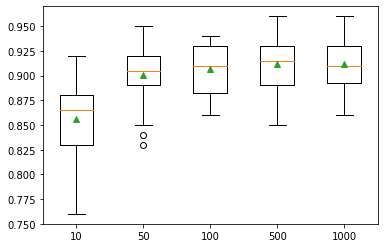

In [5]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000] # 5000 is too much
	for n in n_trees:
		models[str(n)] = ExtraTreesClassifier(n_estimators=n)
  # models[str(i)] = ExtraTreesClassifier(max_features=i)
  # models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()